In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

from PIL import Image
import scipy

In [2]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [3]:
def initialize_with_zero(dim):
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

In [4]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    
    cost = np.sum(-(Y*np.log(A)+(1-Y)*np.log(1-A)))/m

    dw = (np.dot(X, (A-Y).T))/m
    db = np.sum(A-Y)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [5]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
    
        dw = grads["dw"]
        db = grads["db"]
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [6]:
def predict(w, b, X):
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X)+b)

    for i in range(A.shape[1]):
        A = A.reshape(m,)
        Y_hat = y_pred.reshape(m,)
        if(A[i]<=0.5):
            Y_hat[i]=0
        elif(A[i]>0.5):
            Y_hat[i]=1
    assert(y_pred.shape == (1, m))

    return y_pred

In [7]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zero(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### CONVERTING IMAGES INTO ARRAY AND MAKING A DATASET

In [8]:
import os
from numpy import asarray

In [9]:
train_dir_cars = os.path.join('train/cars')
test_dir_cars = os.path.join('test/cars')
train_dir_dogs = os.path.join('train/dogs')
test_dir_dogs = os.path.join('test/dogs')

list_train_cars = os.listdir(train_dir_cars)
list_test_cars = os.listdir(test_dir_cars)
list_train_dogs = os.listdir(train_dir_dogs)
list_test_dogs = os.listdir(test_dir_dogs)

In [10]:
X_cars_train = []
y_cars_train = []

for i in range(750):
    img = 'train/cars/'+str(list_train_cars[i])
    im = Image.open(img)
    ima = im.resize((70, 70))
    image = asarray(ima)
    y_op = 0
    X_cars_train.append(image)
    y_cars_train.append(y_op)

In [11]:
X_cars_test = []
y_cars_test = []

for i in range(250):
    img = 'test/cars/'+str(list_test_cars[i])
    im = Image.open(img)
    ima = im.resize((70, 70))
    image = asarray(ima)
    y_op = 0
    X_cars_test.append(image)
    y_cars_test.append(y_op)

In [12]:
X_dogs_train = []
y_dogs_train = []

for i in range(750):
    img = 'train/dogs/'+str(list_train_dogs[i])
    im = Image.open(img)
    ima = im.resize((70, 70))
    image = asarray(ima)
    y_op = 1
    X_dogs_train.append(image)
    y_dogs_train.append(y_op)

In [13]:
X_dogs_test = []
y_dogs_test = []
for i in range(250):
    img = 'test/dogs/'+str(list_test_dogs[i])
    im = Image.open(img)
    ima = im.resize((70, 70))
    image = asarray(ima)
    y_op = 0
    X_dogs_test.append(image)
    y_dogs_test.append(y_op)

In [14]:
train_set_x = X_cars_train+X_dogs_train
test_set_x = X_cars_test+X_dogs_test
train_set_y = y_cars_train+y_dogs_train
test_set_y = y_cars_test+y_dogs_test

In [15]:
def load_data():
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    df_train['img'] = train_set_x
    df_test['img'] = test_set_x
    df_train['id'] = train_set_y
    df_test['id'] = test_set_y

    classes = np.array([b'car',b'dog'])

    return df_train['img'], df_train['id'], df_test['img'], df_test['id'], classes

In [17]:
train_set_x, train_set_y, test_set_x, test_set_y, classes = load_data()

In [18]:
x_train_orig = np.array( [train_set_x[i] for i in range(len(train_set_x))] )

In [19]:
x_test_orig = np.array( [test_set_x[i] for i in range(len(test_set_x))] )

In [20]:
train_set_x_flatten = x_train_orig.reshape(x_train_orig.shape[0], -1).T
test_set_x_flatten = x_test_orig.reshape(x_test_orig.shape[0], -1).T

In [21]:
train_x = train_set_x_flatten/255
test_x = test_set_x_flatten/255

In [22]:
train_y = np.array(train_set_y)
train_y = train_y.reshape((1,train_set_y.shape[0]))
train_y.shape

(1, 1500)

In [23]:
test_y = np.array(test_set_y)
test_y = test_y.reshape((1,test_set_y.shape[0]))
test_y.shape

(1, 500)

### PERFORMANCE OF THE MODEL

In [24]:
d = model(train_x, train_y, test_x, test_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.644606
Cost after iteration 200: 0.552359
Cost after iteration 300: 0.505835
Cost after iteration 400: 0.473185
Cost after iteration 500: 0.447059
Cost after iteration 600: 0.425099
Cost after iteration 700: 0.406161
Cost after iteration 800: 0.389541
Cost after iteration 900: 0.374741
Cost after iteration 1000: 0.361398
Cost after iteration 1100: 0.349257
Cost after iteration 1200: 0.338100
Cost after iteration 1300: 0.327777
Cost after iteration 1400: 0.318160
Cost after iteration 1500: 0.309150
Cost after iteration 1600: 0.300670
Cost after iteration 1700: 0.292655
Cost after iteration 1800: 0.285055
Cost after iteration 1900: 0.277830
train accuracy: 89.33333333333333 %
test accuracy: 40.2 %


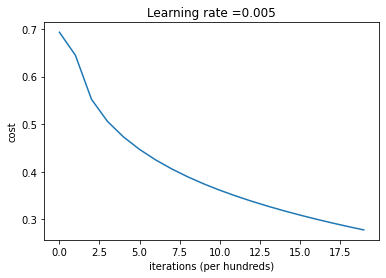

In [27]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### PREDICTION 

y = 1.0, your algorithm predicts a "dog" picture.


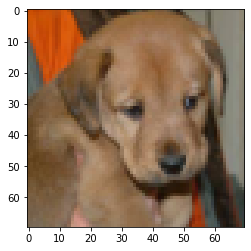

In [26]:
fname = 'test/dogs/'+str(list_test_dogs[877])
im = Image.open(fname)
ima = im.resize((70, 70))
image = asarray(ima)
my_image = image.reshape((1, 70*70*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")